In [1]:
# ALL Libraries needed here

# Data Loading, Manipulation and Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

#Splitting Dataset
from sklearn.model_selection import train_test_split 

# model training
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# Cluster Analysis
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

# Prediction and measurement
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

#Visualization
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [2]:
# Define the Excel file path and sheet names
file_path = 'FeatureEngineeringProjectData2021-2022.xlsx'

# Create an ExcelFile object to open the file
xls = pd.ExcelFile(file_path)

# Get a list of all sheet names (tabs) in the Excel file 
# Getting sheet names as each sheet has data for a new week
sheet_names = xls.sheet_names
print(sheet_names)

len(sheet_names)

['1-1-2021', '1-8-2021', '1-15-2021', '1-22-2021', '1-29-2021', '2-5-2021', '2-12-2021', '2-19-2021', '2-26-2021', '3-5-2021', '3-12-2021', '3-19-2021', '3-26-2021', '4-2-2021', '4-9-2021', '4-16-2021', '4-23-2021', '4-30-2021', '5-7-2021', '5-14-2021', '5-21-2021', '5-28-2021', '6-4-2021', '6-11-2021', '6-18-2021', '6-25-2021', '7-2-2021', '7-9-2021', '7-16-2021', '7-23-2021', '7-30-2021', '8-6-2021', '8-13-2021', '8-20-2021', '8-27-2021', '9-3-2021', '9-10-2021', '9-17-2021', '9-24-2021', '10-1-2021', '10-8-2021', '10-15-2021', '10-22-2021', '10-29-2021', '11-5-2021', '11-12-2021', '11-19-2021', '11-26-2021', '12-3-2021', '12-10-2021', '12-17-2021', '12-24-2021', '12-31-2021', '1-7-2022', '1-14-2022', '1-21-2022', '1-28-2022', '2-4-2022', '2-11-2022', '2-18-2022', '2-25-2022', '3-4-2022', '3-11-2022', '3-18-2022', '3-25-2022', '4-1-2022', '4-8-2022', '4-15-2022', '4-22-2022', '4-29-2022', '5-6-2022', '5-13-2022', '5-20-2022', '5-27-2022', '6-3-2022', '6-10-2022', '6-17-2022', '6-24-2

105

#### Now we cant to create a list of dataframes for every excel sheet and then combine them to make one dataframe with 4 columns. 

In [3]:
# Create an empty list to store DataFrames
df_list = []

# Iterate through each sheet (date)
for sheet_name in sheet_names:
 # Read data from the current sheet, skipping the first row and using the second row as column names
    df = pd.read_excel(xls, sheet_name=sheet_name, header=0, skiprows=[0])
    
    # Add a 'Date' column with the current sheet's name
    df['Date'] = sheet_name
    
    # Append the DataFrame to the list
    df_list.append(df)

# shows our list of data frames 
df_list

[     Symbol   Price  Vol. (1000s)      Date
 0      ALRS   27.37            26  1-1-2021
 1      AMRC   52.37           278  1-1-2021
 2      APPS   56.56          1894  1-1-2021
 3      AVNW   34.15            81  1-1-2021
 4       CCB   21.00            15  1-1-2021
 ...     ...     ...           ...       ...
 8066    ZIG   22.94             3  1-1-2021
 8067   ZJPN   88.54             2  1-1-2021
 8068   ZROZ  163.69            57  1-1-2021
 8069    ZSL    6.85          1048  1-1-2021
 8070    ZTR    8.79           165  1-1-2021
 
 [8071 rows x 4 columns],
      Symbol   Price  Vol. (1000s)      Date
 0      AEIS  112.26           236  1-8-2021
 1      ALRS   29.46            24  1-8-2021
 2      AMRC   61.33          1057  1-8-2021
 3      APPS   52.11          2588  1-8-2021
 4      ASML  508.74           724  1-8-2021
 ...     ...     ...           ...       ...
 8084   ZJPN   90.62             3  1-8-2021
 8085   ZNTE   10.44           504  1-8-2021
 8086   ZROZ  153.45       

In [4]:
# Concatenate all DataFrames into one using pd.concat
combined_df = pd.concat(df_list, ignore_index=True)
# shows top 5 rows of our comined df
combined_df.head()

,Symbol,Price,Vol. (1000s),Date
0,ALRS,27.37,26,1-1-2021
1,AMRC,52.37,278,1-1-2021
2,APPS,56.56,1894,1-1-2021
3,AVNW,34.15,81,1-1-2021
4,CCB,21.00,15,1-1-2021


#### Now that we have our dataframe ready, we want to analyze, explore and clean the data. 

## Data Preprocessing

### Check for missing values in the dataframe

In [5]:
#check if all values in each column of the dataframe are missing 
print(combined_df.isnull().all())

Symbol          False
Price           False
Vol. (1000s)    False
Date            False
dtype: bool


In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966787 entries, 0 to 966786
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Symbol        966760 non-null  object 
 1   Price         966787 non-null  float64
 2   Vol. (1000s)  966787 non-null  int64  
 3   Date          966787 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 29.5+ MB


We can see that there are 966760 non-null rows in the column 'Symbol' but 966787 non-null rows in the rest of the columns. That means there are some rows that contains nan values in Symbol column that we want to drop. 

In [7]:
# check if any row contains NaN values
contains_nan = combined_df.isna().any(axis=1)

# Print rows that contain NaN values
rows_with_nan = combined_df[contains_nan]
print(rows_with_nan)

       Symbol  Price  Vol. (1000s)        Date
714617    NaN   9.50             0    7-1-2022
724303    NaN   9.50             0    7-8-2022
730234    NaN   7.20            32   7-15-2022
739608    NaN   6.79            37   7-22-2022
749417    NaN   9.62           858   7-29-2022
759232    NaN   7.09           406    8-5-2022
767593    NaN   6.37            32   8-12-2022
777495    NaN   6.05            35   8-19-2022
787193    NaN   5.30            55   8-26-2022
797765    NaN   4.47          3907    9-2-2022
807445    NaN   4.04           131    9-9-2022
816136    NaN   5.56           244   9-16-2022
826672    NaN   3.97           139   9-23-2022
836710    NaN   1.61           232   9-30-2022
846045    NaN   1.57            44   10-7-2022
856018    NaN   1.29           179  10-14-2022
865725    NaN   1.19           262  10-21-2022
875495    NaN   1.28            34  10-28-2022
885184    NaN   1.12            50   11-4-2022
894644    NaN   1.29           149  11-11-2022
903977    NaN

Removing rows that contain 'NaN' values

In [8]:
df_cleaned = combined_df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966760 entries, 0 to 966786
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Symbol        966760 non-null  object 
 1   Price         966760 non-null  float64
 2   Vol. (1000s)  966760 non-null  int64  
 3   Date          966760 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 36.9+ MB


#### We can see that there are no missing values in the data frame. There are 4 columns and 966760 rows in this data frame. The data types are correctly set for all columns except for date. Data type needs to be changed for date column to datetime64. 

In [9]:
# Convert the 'Date' column to datetime
df_cleaned.loc[:,'Date'] = pd.to_datetime(df_cleaned['Date'])

In [10]:
df_cleaned.dtypes

Symbol                  object
Price                  float64
Vol. (1000s)             int64
Date            datetime64[ns]
dtype: object

#### To make sure all the symbols have records for all dates and nothing is missing, we want to check the total number of unique dates in the dataset. We also want to group the data by symbol and count the number of unique dates for each symbol. And filter out the symbols that have a unique date count less than the total count of unique dates.

In [11]:
# Calculate the total number of unique dates
total_dates = df_cleaned['Date'].nunique()
print(total_dates)

105


In [12]:
# Group the data by symbol and count unique dates for each symbol
symbol_date_counts = df_cleaned.groupby('Symbol')['Date'].nunique().reset_index()
symbol_date_counts

,Symbol,Date
0,A,105
1,AA,105
2,AAA,105
3,AAAU,105
4,AAC,93
...,...,...
11160,ZWS,65
11161,ZY,79
11162,ZYME,105
11163,ZYNE,105


In [13]:
symbols_with_less_than_105_dates = symbol_date_counts[symbol_date_counts['Date'] < 105]['Symbol']
symbols_with_less_than_105_dates.count()

4271

#### We saw that 4271 symbols do not have records for all dates. Thus, we will filter them out of our data set. 

In [14]:
# Drop all the symbols with date counts less than 105
filtered_df = df_cleaned[~df_cleaned['Symbol'].isin(symbols_with_less_than_105_dates)]
print(filtered_df.shape)
filtered_df.head()

(723870, 4)


,Symbol,Price,Vol. (1000s),Date
0,ALRS,27.37,26,2021-01-01
1,AMRC,52.37,278,2021-01-01
2,APPS,56.56,1894,2021-01-01
3,AVNW,34.15,81,2021-01-01
4,CCB,21.00,15,2021-01-01


In [15]:
# sort filtered_df by symbol and then by date
sorted_df = filtered_df.sort_values(by=['Symbol', 'Date'])
sorted_df.head()

,Symbol,Price,Vol. (1000s),Date
576,A,118.52,1279,2021-01-01
8595,A,127.20,1550,2021-01-08
16685,A,126.24,1765,2021-01-15
24743,A,126.27,1364,2021-01-22
33081,A,120.19,1410,2021-01-29


In [16]:
sorted_df['Symbol'].nunique()

6894

There are 6,894 symbols left after filtering out the symbols with missing record for certain dates. 

In [17]:
# rename Vol. (1000s) column to Volume for convenience
sorted_df.rename(columns={'Vol. (1000s)':'Volume'}, inplace=True)

In [18]:
sorted_df.head()

,Symbol,Price,Volume,Date
576,A,118.52,1279,2021-01-01
8595,A,127.20,1550,2021-01-08
16685,A,126.24,1765,2021-01-15
24743,A,126.27,1364,2021-01-22
33081,A,120.19,1410,2021-01-29


### Using technical indicators like RSI, SMA, MACD - developing and testing trading strategies based on the technical indicators

### The criterion we want to use for our stocks to be considered for inclusion in our portfolio list is market capitalization and liquidity.  This will create a preliminary list of potential symbols for our portfolio. 

#### The market capitalization is calculated using the formula:
##### Market Capiltalization = Weekly Closing Stock Prices X Weekly Trade Volume

#### Liquidity measures how quickly a stock can be bought or sold in the market without significantly impacting its price.
##### We will use Average Weekly Trading Volume as a metric for liquidity using the formula:
##### Average Weekly Trading Volume = Sum of Weekly Trading Volumes for the given data period/ Number of weeks in that period

### Calculate the composite score for each symbol:
We want to get a composite score based on the criterias above. 
#### The composite score for each symbol is calculated a weighted sum formula:

##### Composite Score = (Weight for Market Capitalization)x(Normalized Market Capitalization) + (Weight for Liquidity)x(Normalized Liquidity)


Then we will rank companies based on their composite scores. Higher scores represent stronger candidates for inclusion in our index.

#### We will select the Top Symbols we want in our index. 

In [19]:
mc_df = sorted_df.copy()

#calculate market capitalization for each symbol
mc_df['MarketCapitalization']= mc_df['Price']*mc_df['Volume']

# calculate liquidity for each symbol
mc_df['Liquidity'] = mc_df.groupby('Symbol')['Volume'].transform('mean')

In [20]:
# Normalize MarketCapitalization and Liquidity Columns using MinMaxScaler()
# Since we are comparing all symbols without focus on industry-specific analysis, global normalization will be the most appropriate here

#Initialize the MinMaxScaler 
scaler = MinMaxScaler()

#Specify the name of columns after normalizing
columns_after_normalizing = ['NormalizedMC', 'NormalizedLiquidity']

mc_df[columns_after_normalizing] = scaler.fit_transform(mc_df[['MarketCapitalization','Liquidity']])

As a investor, we are seeking stability/ long-term investing thus we applied higher weight 0.6 to market capitalization, and a slightly lower weight 0.4 to liquidity. 

In [21]:
mc_df['CompositeScore']= 0.6 * mc_df['NormalizedMC'] + 0.4 * mc_df['NormalizedLiquidity']

In [22]:
mc_df['AggregateScore'] = mc_df.groupby('Symbol')['CompositeScore'].transform('mean')

In [23]:
symbol_ranking = mc_df.groupby('Symbol')['AggregateScore'].mean().rank(ascending=False, method='first')

#map the symbol ranking to 
mc_df['SymbolRank'] = mc_df['Symbol'].map(symbol_ranking)

In [24]:
mc_df.head()

,Symbol,Price,Volume,Date,MarketCapitalization,Liquidity,NormalizedMC,NormalizedLiquidity,CompositeScore,AggregateScore,SymbolRank
576,A,118.52,1279,2021-01-01,151587.08,1550.07619,0.001711,0.011268,0.005534,0.005956,1061.0
8595,A,127.20,1550,2021-01-08,197160.00,1550.07619,0.002226,0.011268,0.005842,0.005956,1061.0
16685,A,126.24,1765,2021-01-15,222813.60,1550.07619,0.002515,0.011268,0.006016,0.005956,1061.0
24743,A,126.27,1364,2021-01-22,172232.28,1550.07619,0.001944,0.011268,0.005674,0.005956,1061.0
33081,A,120.19,1410,2021-01-29,169467.90,1550.07619,0.001913,0.011268,0.005655,0.005956,1061.0


In [25]:
top_50_symbols = mc_df[['Symbol', 'SymbolRank']].drop_duplicates().sort_values(by='SymbolRank').head(50)
top_50_symbols

,Symbol,SymbolRank
7622,SPY,1.0
4490,SNDL,2.0
628,AAPL,3.0
7630,SQQQ,4.0
7742,TQQQ,5.0
7318,QQQ,6.0
45,TSLA,7.0
55,AMD,8.0
5025,AMC,9.0
1485,F,10.0


### To further evaluate and/or narrow down our choices we will use Technical Analysis Indicators(MACD, RSI and SMA). 

#### MACD: It helps identify changes in momentum and potential trend reversals e.g when MACD line crosses signal line, it would be the entry point.
#### RSI:  It measures the relative strength of a stock. RSI values above 70 indicate overbought conditions, while values below 30 indicate oversold conditions. 
#### SMA: A stock trading above its SMA can indicate upward trend, while trading below SMA can indicate a downtrend. 

#### Calculate Simple Moving Average(SMA)

In [26]:
# Calculate 20-week and 60-week moving averages
sma_20 = mc_df.groupby('Symbol')['Price'].transform(lambda x:x.rolling(window=20).mean())
sma_60 = mc_df.groupby('Symbol')['Price'].transform(lambda x:x.rolling(window=60).mean())

#Assign the SMA values to their respective columns
mc_df['SMA_20'] = sma_20
mc_df['SMA_60']= sma_60
mc_df.head()

,Symbol,Price,Volume,Date,MarketCapitalization,Liquidity,NormalizedMC,NormalizedLiquidity,CompositeScore,AggregateScore,SymbolRank,SMA_20,SMA_60
576,A,118.52,1279,2021-01-01,151587.08,1550.07619,0.001711,0.011268,0.005534,0.005956,1061.0,NaN,NaN
8595,A,127.20,1550,2021-01-08,197160.00,1550.07619,0.002226,0.011268,0.005842,0.005956,1061.0,NaN,NaN
16685,A,126.24,1765,2021-01-15,222813.60,1550.07619,0.002515,0.011268,0.006016,0.005956,1061.0,NaN,NaN
24743,A,126.27,1364,2021-01-22,172232.28,1550.07619,0.001944,0.011268,0.005674,0.005956,1061.0,NaN,NaN
33081,A,120.19,1410,2021-01-29,169467.90,1550.07619,0.001913,0.011268,0.005655,0.005956,1061.0,NaN,NaN


#### Calculate Relative Strength Index (RSI)
Choose shorter RSI period if you are a short-term trader and are looking for quick signals. Shorter RSI period is also suitable for ranging markets and is more sensitive to price changes. 
Choose longer RSI period if you are a long-term trader. Longer RSI period is more effective in trending markets, is less sensitive to price changes, and is more useful in for a volatile stock that may require longer RSI period to smooth out the noise. 

We will use a shorter RSI in combination with longer RSI to gain different perspective on the stocks.

In [27]:
def calculate_RSI(df, rsi_period):
    '''Returns the RSI value'''
    rsi_period = rsi_period
    
    #Calculate the price change for each symbol
    price_change = df.groupby('Symbol')['Price'].diff()
    
    #Calculate the gain and loss
    gain=price_change.where(price_change > 0,0)
    loss= - price_change.where(price_change < 0,0)
    
    #Calculate the average gain and average loss over the RSI period
    avg_gain = gain.groupby(df['Symbol']).rolling(window=rsi_period).mean().reset_index(level=0, drop=True)
    avg_loss = loss.groupby(df['Symbol']).rolling(window=rsi_period).mean().reset_index(level=0, drop=True)
    
    #Calculate the relative strength (RS) and RSI
    rs= avg_gain / avg_loss
    rsi = 100-(100/(1+rs))
    
    return rsi

In [28]:
#Assign RSI values to the DataFrame
mc_df['st_RSI'] = calculate_RSI(mc_df, 20)
mc_df['lt_RSI'] = calculate_RSI(mc_df, 60)

#### Calculate Moving Average Convergence Divergence (MACD)

In [29]:
# Define the short and long windows for MACD
short_window = 20
long_window = 60

#Calculate short-term and long-term EMA
short_ema = mc_df.groupby('Symbol')['Price'].transform(lambda x: x.ewm(span=short_window).mean())
long_ema = mc_df.groupby('Symbol')['Price'].transform(lambda x: x.ewm(span=long_window).mean())

#Calculate MACD line and signal line
macd_line = short_ema - long_ema
signal_line = macd_line.ewm(span=9).mean()

#Assign MACD values to the DataFrame
mc_df['MACD'] = macd_line
mc_df['Signal_Line'] = signal_line

In [30]:
mc_df

,Symbol,Price,Volume,Date,MarketCapitalization,Liquidity,NormalizedMC,NormalizedLiquidity,CompositeScore,AggregateScore,SymbolRank,SMA_20,SMA_60,st_RSI,lt_RSI,MACD,Signal_Line
576,A,118.52,1279,2021-01-01,151587.08,1550.076190,0.001711,0.011268,0.005534,0.005956,1061.0,NaN,NaN,NaN,NaN,0.000000,0.000000
8595,A,127.20,1550,2021-01-08,197160.00,1550.076190,0.002226,0.011268,0.005842,0.005956,1061.0,NaN,NaN,NaN,NaN,0.144667,0.080370
16685,A,126.24,1765,2021-01-15,222813.60,1550.076190,0.002515,0.011268,0.006016,0.005956,1061.0,NaN,NaN,NaN,NaN,0.166593,0.115708
24743,A,126.27,1364,2021-01-22,172232.28,1550.076190,0.001944,0.011268,0.005674,0.005956,1061.0,NaN,NaN,NaN,NaN,0.175758,0.136050
33081,A,120.19,1410,2021-01-29,169467.90,1550.076190,0.001913,0.011268,0.005655,0.005956,1061.0,NaN,NaN,NaN,NaN,0.006872,0.097622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918789,ZYXI,13.80,135,2022-12-02,1863.00,387.466667,0.000021,0.002817,0.001139,0.001158,3041.0,10.1470,9.125167,75.963149,53.889216,0.705870,-0.000429
928430,ZYXI,13.34,364,2022-12-09,4855.76,387.466667,0.000055,0.002817,0.001159,0.001158,3041.0,10.4340,9.146333,73.145161,51.896088,0.847997,0.169256
938188,ZYXI,13.58,241,2022-12-16,3272.78,387.466667,0.000037,0.002817,0.001149,0.001158,3041.0,10.6840,9.167333,71.440823,51.881720,0.984340,0.332273
947862,ZYXI,13.81,180,2022-12-23,2485.80,387.466667,0.000028,0.002817,0.001143,0.001158,3041.0,10.9075,9.188667,70.080863,51.910448,1.114589,0.488736


#### Checking what the technical indicators suggest for the top 5 symbols from our analysis above

In [31]:
top_5_symbols = mc_df[['Symbol', 'SymbolRank']].drop_duplicates().sort_values(by='SymbolRank').head(5)
top_5_symbols_list = top_5_symbols['Symbol'].tolist()
top_5_symbols_list

['SPY', 'SNDL', 'AAPL', 'SQQQ', 'TQQQ']

### Visualization

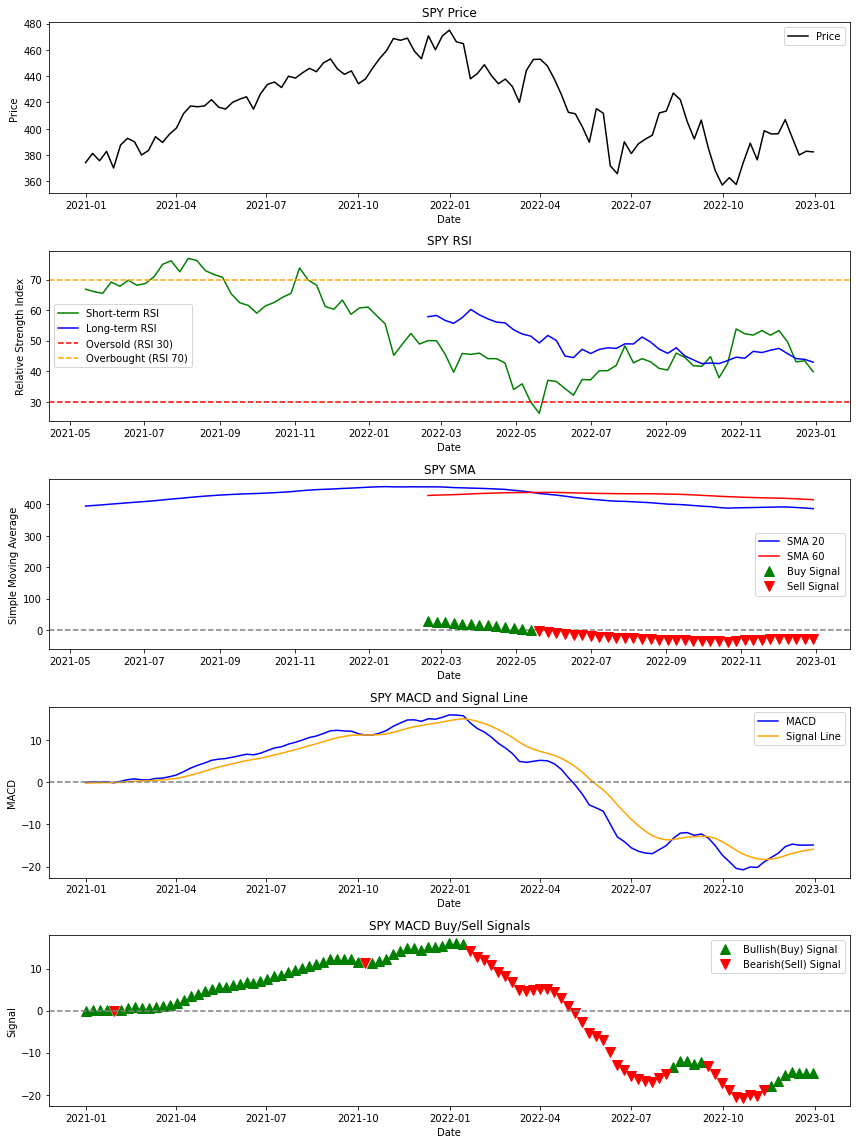

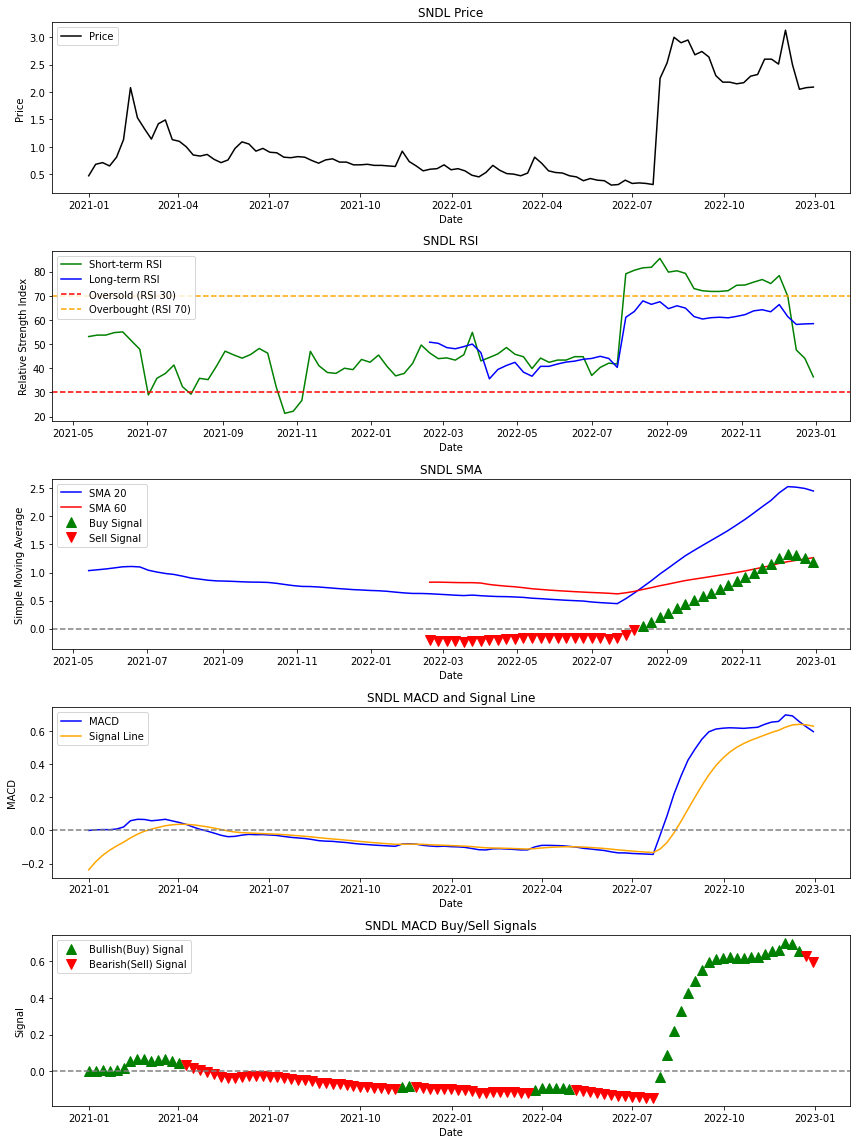

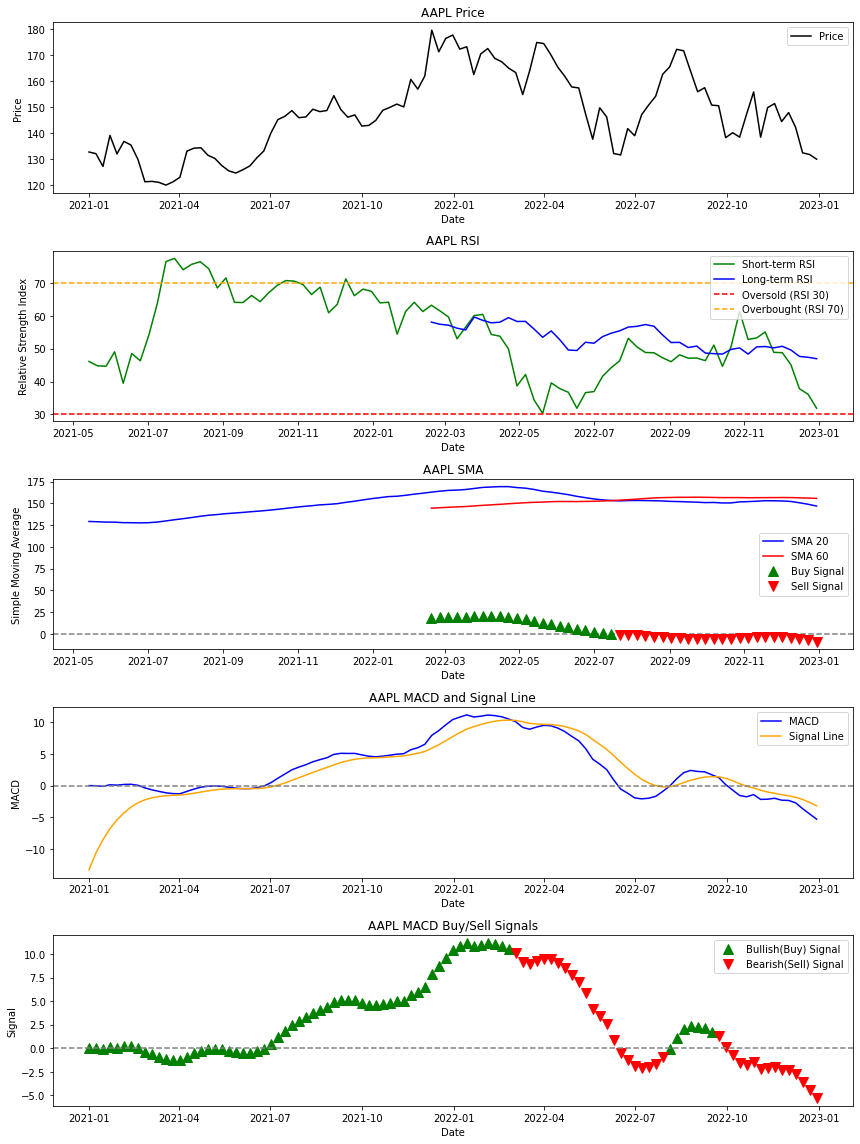

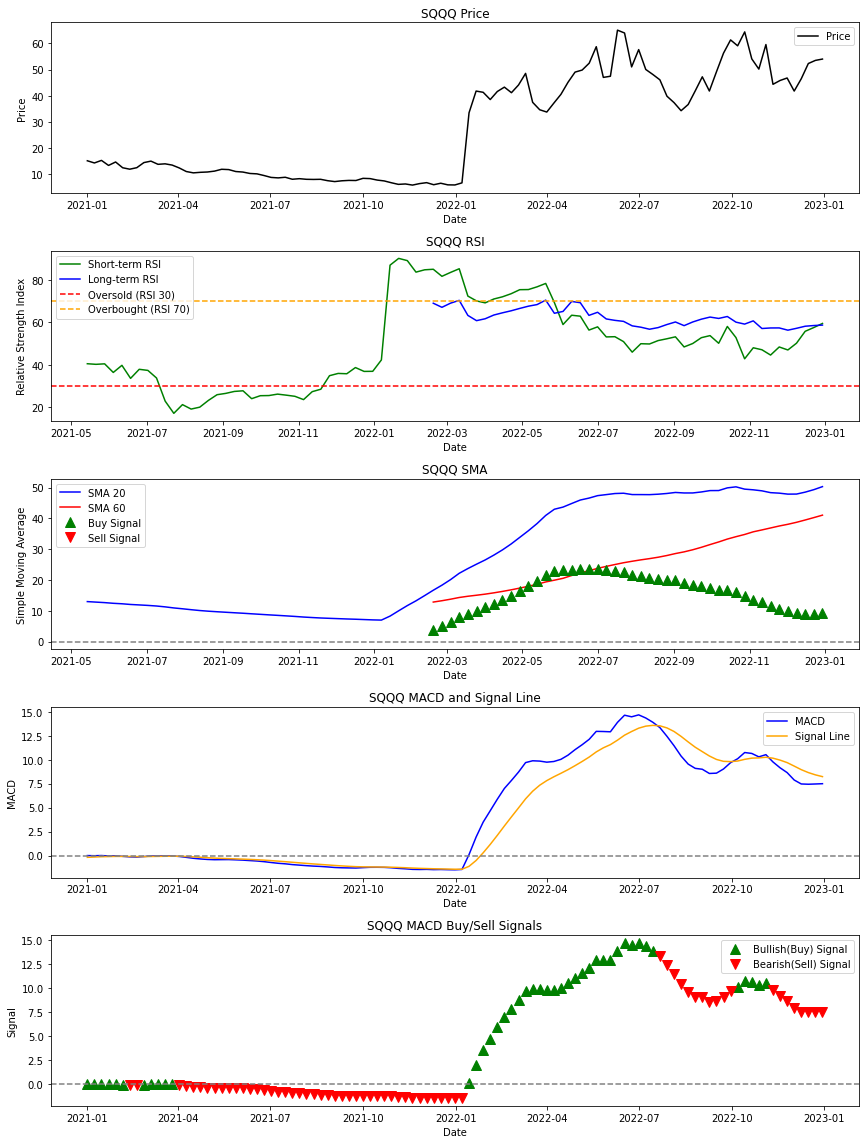

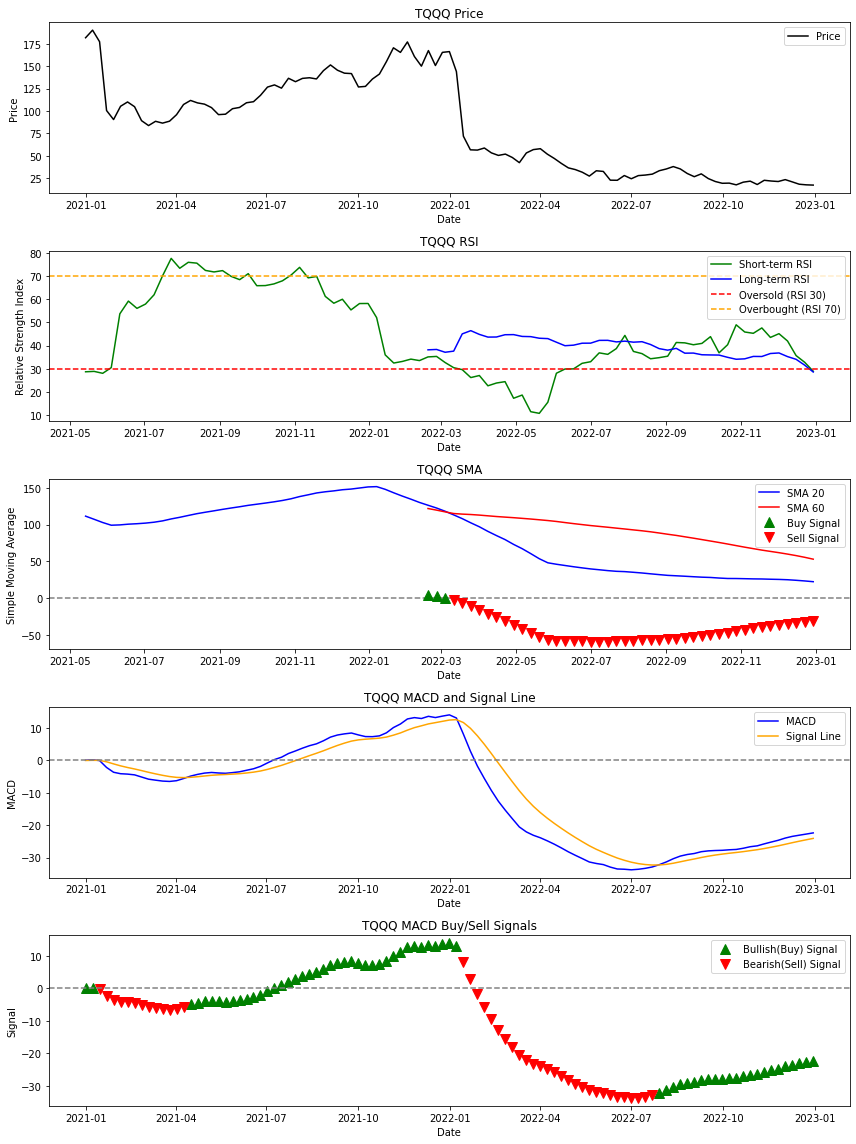

In [32]:
for symbol in top_5_symbols_list:
    #filter the data for the specific symbol
    symbol_df = mc_df[mc_df['Symbol'] == symbol]
    
    # Create a new figure for each symbol with subplots
    
    fig, axes = plt.subplots(5,1, figsize=(12,16))
    
    #Plot the Price data for the symbol
    axes[0].plot(symbol_df['Date'], symbol_df['Price'], label='Price', color='black')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Price')
    axes[0].set_title(f'{symbol} Price')
    axes[0].legend()    
    
    # Plot the Relative Strength Index for the symbol
    axes[1].plot(symbol_df['Date'], symbol_df['st_RSI'], label='Short-term RSI', color='green')
    axes[1].plot(symbol_df['Date'], symbol_df['lt_RSI'], label='Long-term RSI', color='blue')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Relative Strength Index')
    axes[1].set_title(f'{symbol} RSI')
    axes[1].legend()  
    
    # Add horizontal lines at RSI 30 and 70 for oevrbought and oversold reference
    axes[1].axhline(30, color ='red', linestyle='--', label = 'Oversold (RSI 30)')
    axes[1].axhline(70, color ='orange', linestyle='--', label = 'Overbought (RSI 70)')
    axes[1].legend()
    
    # Plot the SMA data for the symbol
    axes[2].plot(symbol_df['Date'], symbol_df['SMA_20'], label='SMA 20', color='blue')
    axes[2].plot(symbol_df['Date'], symbol_df['SMA_60'], label='SMA 60', color='red')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Simple Moving Average')
    axes[2].set_title(f'{symbol} SMA')
    axes[2].legend()  
    
    # Plot Buy and Sell signals based on SMA crossovers
    axes[2].axhline(0, color ='gray', linestyle='--') # horizontal line at zero for SMA crossover
    buy_signals = symbol_df['SMA_20'] > symbol_df['SMA_60']
    sell_signals = symbol_df['SMA_20'] < symbol_df['SMA_60']
    axes[2].plot(symbol_df['Date'][buy_signals], symbol_df['SMA_20'][buy_signals]-symbol_df['SMA_60'][buy_signals], '^', markersize=10, color='green', label='Buy Signal')
    axes[2].plot(symbol_df['Date'][sell_signals], symbol_df['SMA_20'][sell_signals]-symbol_df['SMA_60'][sell_signals],'v', markersize=10, color='red', label='Sell Signal')
    axes[2].legend() 
    
    # Plot the MACD and Signal Line for the symbol
    axes[3].plot(symbol_df['Date'], symbol_df['MACD'], label='MACD', color='blue')
    axes[3].plot(symbol_df['Date'], symbol_df['Signal_Line'], label='Signal Line', color='orange')
    axes[3].set_xlabel('Date')
    axes[3].set_ylabel('MACD')
    axes[3].set_title(f'{symbol} MACD and Signal Line')
    axes[3].axhline(0, color ='gray', linestyle='--') # horizontal line at zero for MACD
    axes[3].legend()  
    
    # Plot bullish(buy) and bearish(sell) signals to the MACD plot
    axes[4].plot(symbol_df['Date'][symbol_df['MACD'] > symbol_df['Signal_Line']], symbol_df['MACD'][symbol_df['MACD']> symbol_df['Signal_Line']], '^', markersize=10, color='green', label='Bullish(Buy) Signal')
    axes[4].plot(symbol_df['Date'][symbol_df['MACD'] < symbol_df['Signal_Line']], symbol_df['MACD'][symbol_df['MACD']< symbol_df['Signal_Line']],'v', markersize=10, color='red', label='Bearish(Sell) Signal')
    axes[4].set_xlabel('Date')
    axes[4].set_ylabel('Signal')
    axes[4].set_title(f'{symbol} MACD Buy/Sell Signals')  
    axes[4].axhline(0, color ='gray', linestyle='--') # horizontal line at zero for SMA crossover 
    axes[4].legend()     
    
    #Add space between subplots
    plt.tight_layout()
    
    #Show the plots
    plt.show()

#### Interpreting the technical indicator plots for SPY
Looking at the RSI plot for SPY, the short-term RSI is above the upper threshold for a brief period of time (July 2021 to September 2021), suggesting that the security is potentially overbought. This means that the price may have risen too quickly, which aligns with the observations from the price graph above, and a reversal or correction may be forthcoming. Also, the short-term RSI is below the lower threshold around the beginning of June, indicating the price may have fallen too quickly and a reversal is more likely. As seen on the price graph, the price increased immediately after that.

The long-term RSI is smoother and stays within the threshold. The short-term RSI is above the long-term RSI from October 2022 to Mid-December 2022, suggesting that the recent price momemtum is strong, and the security is potentially in an uptrend. This could be the right time to consider buying the security. 

The findings from RSI align with the findings from MACD, which also suggests buying the security around the same time period. Whereas, the SMA has suggests selling securities after June 2022. 

Thus, it is important to utilize a combination of technical indicators along with other analysis to make well-informed trading decisions. 